In [5]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length 63252113 bytes


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/EBMRS/

/content/drive/MyDrive/EBMRS


In [9]:
!ls

archive.zip


In [62]:
# !mv emotion1.ipynb /content/drive/MyDrive/EBMRS

mv: cannot stat 'emotion.ipynb': No such file or directory


In [ ]:
# !unzip '/content/drive/MyDrive/EBMRS/archive.zip' -d '/content/drive/MyDrive/EBMRS/tt_data'

In [ ]:
# labels: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

(48, 48, 3)
(1, 48, 48, 3)


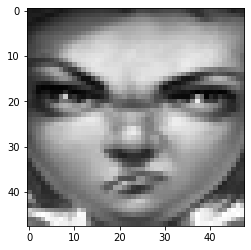

In [12]:
from keras.preprocessing import image
img = image.load_img('tt_data/train/angry/Training_37417413.jpg',target_size=(48,48))
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

# DATA AUGMENTATION

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
batch_size = 32

In [31]:
train_datagen1 = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,        #zoom in the range [1-zoom_range,1+zoom_range]
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen1 = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen1  = ImageDataGenerator(rescale = 1./255)

In [32]:
train_dataset1  = train_datagen1.flow_from_directory(directory = 'tt_data/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   color_mode = 'grayscale',
                                                   shuffle = True,
                                                   batch_size = batch_size)

Found 28709 images belonging to 7 classes.


In [33]:
valid_dataset1 = valid_datagen1.flow_from_directory(directory = 'tt_data/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size, 
                                                  shuffle = True)

Found 5741 images belonging to 7 classes.


In [34]:
test_dataset1 = test_datagen1.flow_from_directory(directory = 'tt_data/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size, 
                                                  shuffle = True)

Found 7178 images belonging to 7 classes.


In [36]:
train_img = train_dataset1.next()[0]
train_lables = train_dataset1.next()[1]
valid_img = valid_dataset1.next()[0]
valid_lables = valid_dataset1.next()[1]

print(f'shape of the train dataset: {train_img.shape}')
print(f'shape of the train labels: {train_lables.shape}')
print(f'shape of the validation dataset: {train_img.shape}')
print(f'shape of the validation labels: {train_lables.shape}')

shape of the train dataset: (32, 48, 48, 1)
shape of the train labels: (32, 7)
shape of the validation dataset: (32, 48, 48, 1)
shape of the validation labels: (32, 7)


# Convolution neural network

In [37]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [38]:
def build_model():  
  model = keras.Sequential([
                            
    #block-1                      
    Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='he_normal', activation='relu', input_shape=(48,48,1)),
    Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='he_normal', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    #block-2
    Conv2D(filters=128, kernel_size=(3,3), kernel_initializer='he_normal', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), kernel_initializer='he_normal', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    BatchNormalization(),

    Dense(7, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [39]:
cnn_model = build_model()

In [40]:
history = cnn_model.fit(
    train_dataset1,
    validation_data=valid_dataset1,
    epochs=5,
    steps_per_epoch=len(train_dataset1),
    validation_steps=len(valid_dataset1)
)


Epoch 1/5
898/898 [==============================] - 58s 63ms/step - loss: 1.9198 - accuracy: 0.2346 - val_loss: 1.8961 - val_accuracy: 0.2048
Epoch 2/5
898/898 [==============================] - 56s 62ms/step - loss: 1.7315 - accuracy: 0.2985 - val_loss: 1.9242 - val_accuracy: 0.2782
Epoch 3/5
898/898 [==============================] - 55s 61ms/step - loss: 1.5895 - accuracy: 0.3745 - val_loss: 1.4374 - val_accuracy: 0.4466
Epoch 4/5
898/898 [==============================] - 57s 63ms/step - loss: 1.4535 - accuracy: 0.4421 - val_loss: 1.3161 - val_accuracy: 0.4963
Epoch 5/5
898/898 [==============================] - 56s 62ms/step - loss: 1.3616 - accuracy: 0.4745 - val_loss: 1.2742 - val_accuracy: 0.4990


In [41]:
history1 = cnn_model.fit(
    train_dataset1,
    validation_data=valid_dataset1,
    epochs=50,
    steps_per_epoch=len(train_dataset1),
    validation_steps=len(valid_dataset1)
)


Epoch 1/50
898/898 [==============================] - 56s 63ms/step - loss: 1.2879 - accuracy: 0.5087 - val_loss: 1.2397 - val_accuracy: 0.5271
Epoch 2/50
898/898 [==============================] - 55s 61ms/step - loss: 1.2449 - accuracy: 0.5269 - val_loss: 1.2660 - val_accuracy: 0.5213
Epoch 3/50
898/898 [==============================] - 54s 61ms/step - loss: 1.2265 - accuracy: 0.5350 - val_loss: 1.2289 - val_accuracy: 0.5361
Epoch 4/50
898/898 [==============================] - 55s 61ms/step - loss: 1.1876 - accuracy: 0.5479 - val_loss: 1.0989 - val_accuracy: 0.5865
Epoch 5/50
898/898 [==============================] - 55s 61ms/step - loss: 1.1791 - accuracy: 0.5524 - val_loss: 1.0815 - val_accuracy: 0.5908
Epoch 6/50
898/898 [==============================] - 55s 62ms/step - loss: 1.1573 - accuracy: 0.5616 - val_loss: 1.0509 - val_accuracy: 0.5968
Epoch 7/50
898/898 [==============================] - 55s 61ms/step - loss: 1.1484 - accuracy: 0.5640 - val_loss: 1.0919 - val_accuracy:

In [47]:
result = new_model.evaluate(
    test_dataset1,
    batch_size = batch_size,
)

225/225 [==============================] - 8s 36ms/step - loss: 0.9788 - accuracy: 0.6427


In [ ]:
# !rm -rf emotio_rec

In [ ]:
# {'conv_1_filter': 64, 'conv_1_kernel': 3, 'conv_2_filter': 64, 'conv_2_kernel': 3, 'conv_3_filter': 64, 'conv_3_kernel': 3, 'conv_4_filter': 64, 'conv_4_kernel': 5, 'dense_1_units': 128, 'learning_rate': 0.001, 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

In [45]:
cnn_model.save('cnn_model.h5')

In [46]:
new_model = keras.models.load_model('cnn_model.h5')

# VGG tranfer learning

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  #  validation_split = 0.2,
                                   rotation_range=5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,        #zoom in the range [1-zoom_range,1+zoom_range]
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)


In [28]:
train_dataset  = train_datagen.flow_from_directory(directory = 'tt_data/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   shuffle = True,
                                                   batch_size = 64)


valid_dataset = valid_datagen.flow_from_directory(directory = 'tt_data/train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64, 
                                                  shuffle = True)


test_dataset = test_datagen.flow_from_directory(directory = 'tt_data/test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64, 
                                                  shuffle = True)


Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
r = model.fit_generator(
  train_dataset,
  validation_data=valid_dataset,
  epochs=5,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(valid_dataset)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
449/449 [==============================] - 416s 836ms/step - loss: 1.8788 - accuracy: 0.2894 - val_loss: 1.5191 - val_accuracy: 0.4137
Epoch 2/5
449/449 [==============================] - 360s 801ms/step - loss: 1.7027 - accuracy: 0.3566 - val_loss: 1.5366 - val_accuracy: 0.4304
Epoch 3/5
449/449 [==============================] - 363s 808ms/step - loss: 1.6580 - accuracy: 0.3788 - val_loss: 1.6229 - val_accuracy: 0.4376
Epoch 4/5
449/449 [==============================] - 363s 808ms/step - loss: 1.6569 - accuracy: 0.3820 - val_loss: 1.5949 - val_accuracy: 0.4161
Epoch 5/5
449/449 [==============================] - 363s 808ms/step - loss: 1.6143 - accuracy: 0.3914 - val_loss: 1.6339 - val_accuracy: 0.4198


# **ResNet50**

In [48]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [49]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'tt_data/train'
valid_path = 'tt_data/test'

# add preprocessing layer to the front of VGG
rn = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in rn.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('tt_data/train/*')
  

# our layers - you can add more if you want
x = Flatten()(rn.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
modelr = Model(inputs=rn.input, outputs=prediction)

# view the structure of the model
modelr.summary()


94773248/94765736 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________

In [50]:
modelr.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('cnn_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [51]:
rh = modelr.fit_generator(
  train_dataset,
  validation_data=valid_dataset,
  epochs=5,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(valid_dataset)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
449/449 [==============================] - 352s 776ms/step - loss: 3.2301 - accuracy: 0.1936 - val_loss: 2.0477 - val_accuracy: 0.1805
Epoch 2/5
449/449 [==============================] - 346s 770ms/step - loss: 2.1144 - accuracy: 0.2162 - val_loss: 2.2980 - val_accuracy: 0.1926
Epoch 3/5
449/449 [==============================] - 345s 768ms/step - loss: 2.1960 - accuracy: 0.2221 - val_loss: 2.0994 - val_accuracy: 0.1930
Epoch 4/5
449/449 [==============================] - 345s 768ms/step - loss: 2.1445 - accuracy: 0.2340 - val_loss: 2.3079 - val_accuracy: 0.2940
Epoch 5/5
449/449 [==============================] - 345s 768ms/step - loss: 2.2364 - accuracy: 0.2259 - val_loss: 2.7573 - val_accuracy: 0.2620


# **CNN other**

In [53]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)       

In [54]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 28709
nb_validation_samples = 5741
epochs=25

history=model.fit(
                train_dataset1,
                steps_per_epoch=nb_train_samples//32,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=valid_dataset1,
                validation_steps=nb_validation_samples//32)


Epoch 1/25
897/897 [==============================] - 57s 62ms/step - loss: 2.4341 - accuracy: 0.1909 - val_loss: 1.8152 - val_accuracy: 0.2750

Epoch 00001: val_loss improved from inf to 1.81515, saving model to Emotion_little_vgg.h5
Epoch 2/25
897/897 [==============================] - 55s 62ms/step - loss: 1.7813 - accuracy: 0.2763 - val_loss: 1.5193 - val_accuracy: 0.3958

Epoch 00002: val_loss improved from 1.81515 to 1.51928, saving model to Emotion_little_vgg.h5
Epoch 3/25
897/897 [==============================] - 55s 61ms/step - loss: 1.6066 - accuracy: 0.3709 - val_loss: 1.3527 - val_accuracy: 0.4811

Epoch 00003: val_loss improved from 1.51928 to 1.35273, saving model to Emotion_little_vgg.h5
Epoch 4/25
897/897 [==============================] - 56s 62ms/step - loss: 1.4554 - accuracy: 0.4399 - val_loss: 1.2930 - val_accuracy: 0.5017

Epoch 00004: val_loss improved from 1.35273 to 1.29304, saving model to Emotion_little_vgg.h5
Epoch 5/25
897/897 [============================

In [61]:
result = model.evaluate(
    test_dataset1,
    batch_size = batch_size,
)

225/225 [==============================] - 8s 37ms/step - loss: 0.9712 - accuracy: 0.6408


# **SAVE** **MODEL**

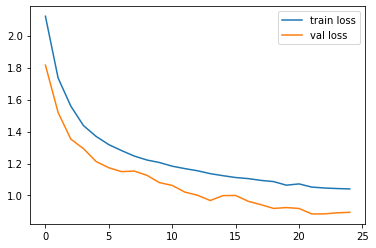

<Figure size 432x288 with 0 Axes>

In [58]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss1')

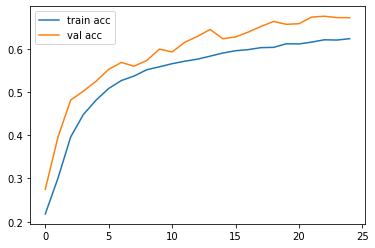

<Figure size 432x288 with 0 Axes>

In [59]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc1')

In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('facefeatures_new_model.h5')